In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl
%matplotlib inline

In [52]:
meter_df = pd.read_csv("DataOx/Wrist_100Hz/P01_wrist100.csv")


In [61]:

data = meter_df['x']**2 + meter_df['y']**2 + meter_df['z']**2
data = data[0:360000]
data = data.apply(lambda x: x**0.5)


In [54]:
def chart(data_in):
    x=range(len(data_in))
    y=data_in
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('index')
    plt.ylabel('magnitude')
    #show x label every 800

In [55]:
import numpy as np
#apply filter 0.0158467315853596	0.0457943754888393	0.121235976281198	0.200244477464560	0.233756878360087	0.200244477464560	0.121235976281198	0.0457943754888393	0.0158467315853596

data = np.convolve(data, [0.0158467315853596,0.0457943754888393,0.121235976281198,0.200244477464560,0.233756878360087,0.200244477464560,0.121235976281198,0.0457943754888393,0.0158467315853596], mode='same')

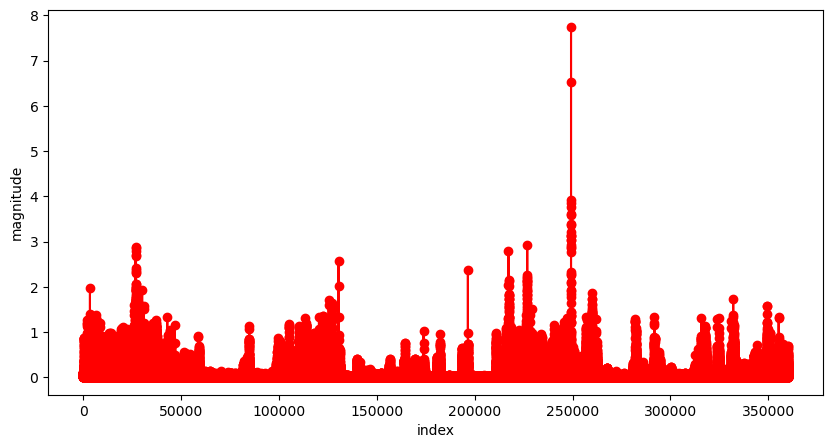

In [71]:
data = maximum_difference(data, 20)
chart(data)

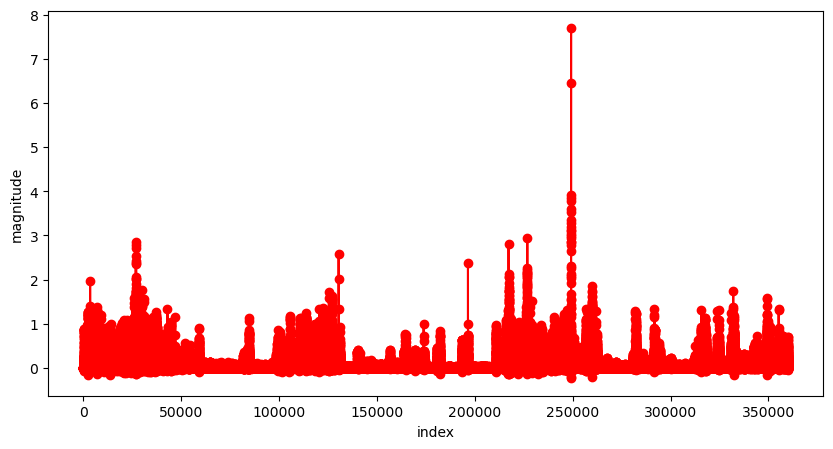

In [72]:
data = msl.maximum_difference(data, 20)
chart(data)

In [57]:
data = msl.detect_outliers(data, 1.2)

In [58]:

data = msl.post_processing(data, 200, 75)


In [70]:
import pandas as pd
from pandas import DataFrame

def maximum_difference(arr, N):
    rolling = pd.Series(arr).rolling(window=N).min()
    return arr - rolling

In [64]:
def mean_difference(arr, N):
    mean_diffs = [0] * N
    for i in range(N, len(arr) - N):
        left_mean_diff = np.mean([arr[i] - arr[i - k] for k in range(1, N + 1)])
        right_mean_diff = np.mean([arr[i] - arr[i + k] for k in range(1, N + 1)])
        mean_diffs.append((left_mean_diff + right_mean_diff) / 2)
    mean_diffs.extend([0] * N)
    return mean_diffs

In [67]:
def mean_difference2(arr, N):
    rolling = pd.Series(arr).rolling(window=N).mean()
    return arr - rolling